In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import make_blobs

%matplotlib inline
plt.style.use('seaborn-white')

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
import os 

UP_DIR = '/Users/isabellachittumuri/Documents/Hunter College/Fall 2020/Stat 724/Jupyter/'
csv_file = os.path.join(UP_DIR,'USArrests.csv')

arrests = pd.read_csv(csv_file)
arrests.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


9. Consider the USArrests data. We will now perform hierarchical clustering on the states.

In [3]:
arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [4]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
arrests.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
# Renaming the column as Unnmaed
arrests = arrests.rename(columns={'Unnamed: 0':'State'})

In [7]:
arrests.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


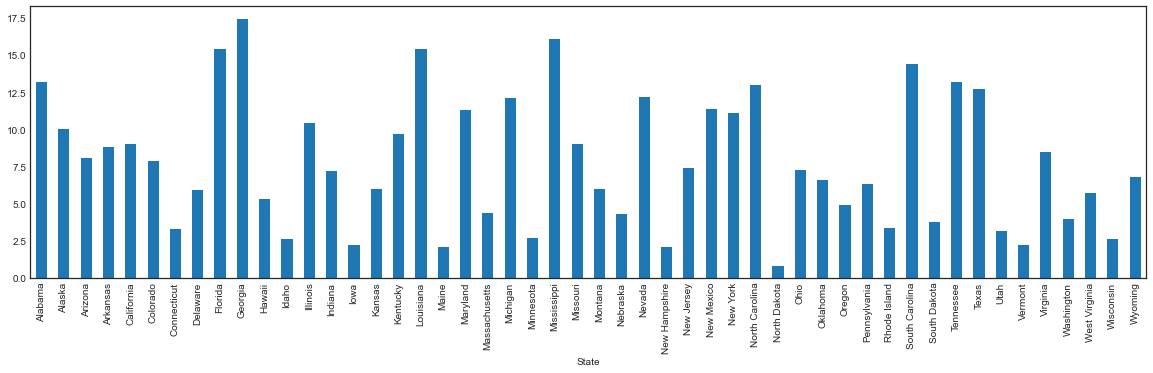

In [8]:
# Murder Rate
plt.figure(figsize=(20,5))
arrests.groupby('State')['Murder'].max().plot(kind='bar') 

Highest Murder Rate : Georgia and Missisippi
Lowest Murder Rate : Idaho , Iowa, Maine, New Hampshire, North Dakota, Vermont and Wisconsin.

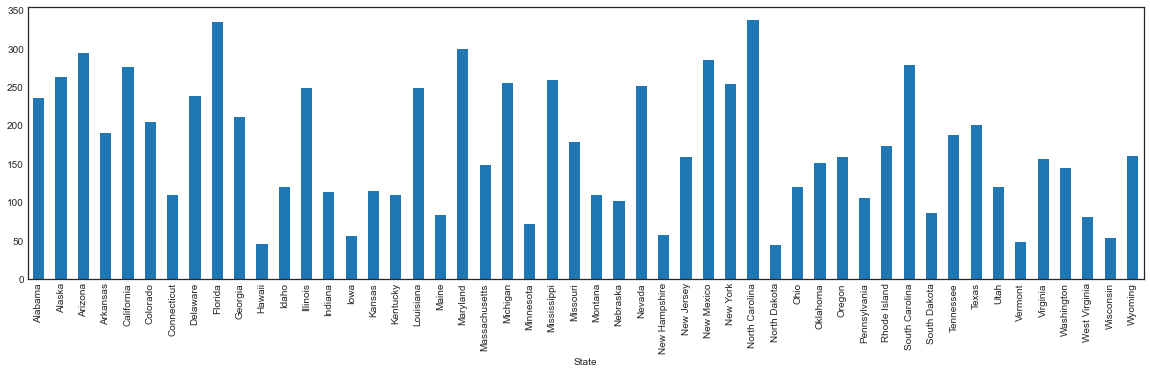

In [9]:
# Assault Rate
plt.figure(figsize=(20,5))
arrests.groupby('State')['Assault'].max().plot(kind='bar')

Highest Assualt Rate : Florida and North California.
Lowest Assualt Rate : Hawaii, North Dakota, Vermont , New Hampshire and Wisconsin.

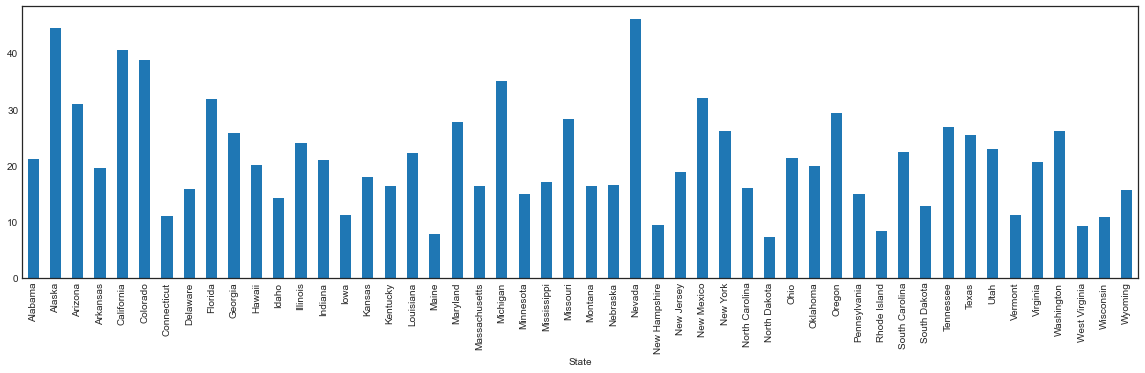

In [10]:
# Rape Rate
plt.figure(figsize=(20,5))
arrests.groupby('State')['Rape'].max().plot(kind='bar')

Highest UrbanPop Rate : Nevada and Alaska.
Lowest UrbanPop Rate : Maine, North Dakota,Vermont,Connecticut,New Hampshire, Wisconsin,Rhode Island and West Virginia

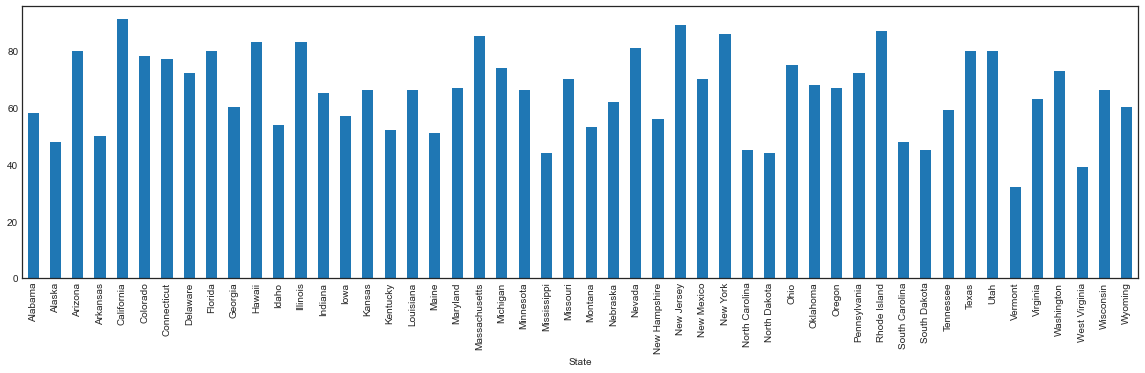

In [11]:
# UrbanPop : Percent Urban Population
plt.figure(figsize=(20,5))
arrests.groupby('State')['UrbanPop'].max().plot(kind='bar')

(a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

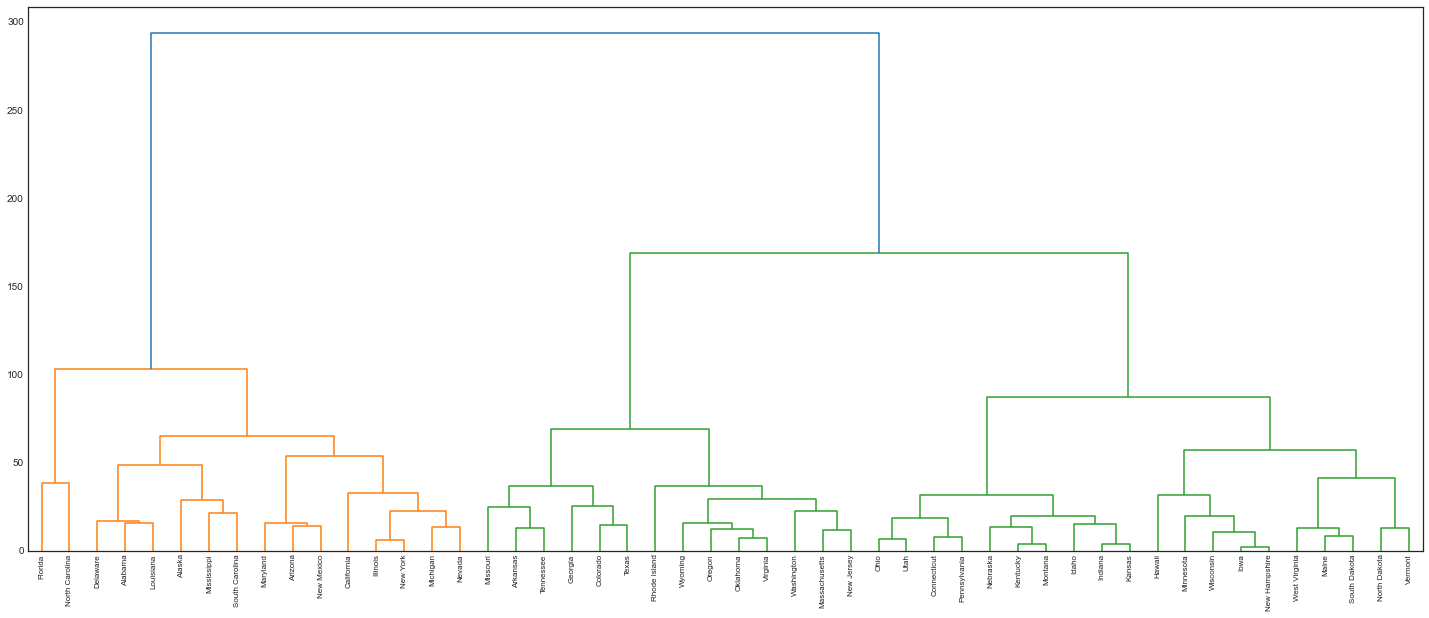

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
crime= arrests[['Murder', 'Assault', 'UrbanPop', 'Rape']]
link = linkage(crime, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(link, labels=arrests['State'].tolist())

(b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

In [13]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_pred = cluster.fit_predict(crime)
y_pred

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

In [14]:
arrests['cluster labels']= y_pred
arrests[['State','cluster labels']]

,State,cluster labels
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


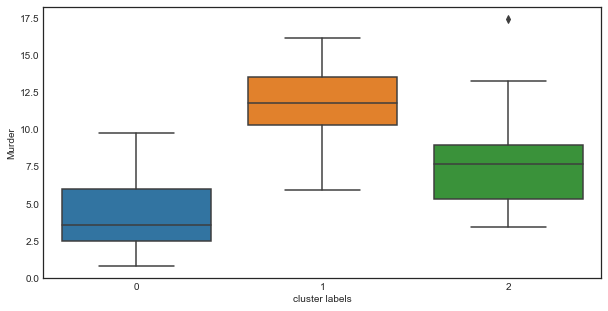

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Murder', data=arrests)

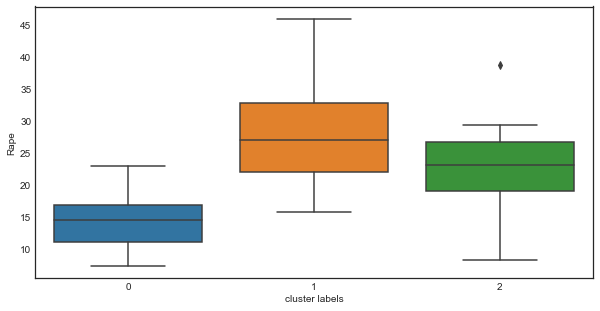

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Rape', data=arrests)

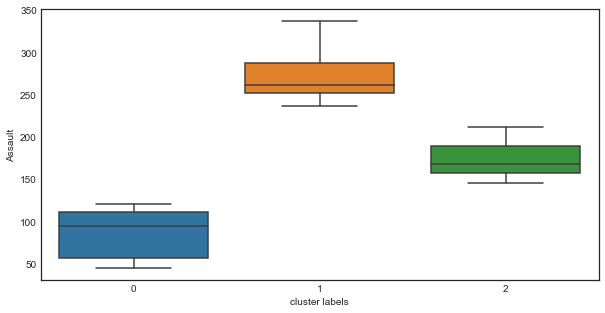

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Assault', data=arrests)

(c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

In [18]:
data = arrests.iloc[:,1:].values

In [19]:
scaled_data = scaler.fit_transform(data)

Text(0, 0.5, 'Euclidean distances')

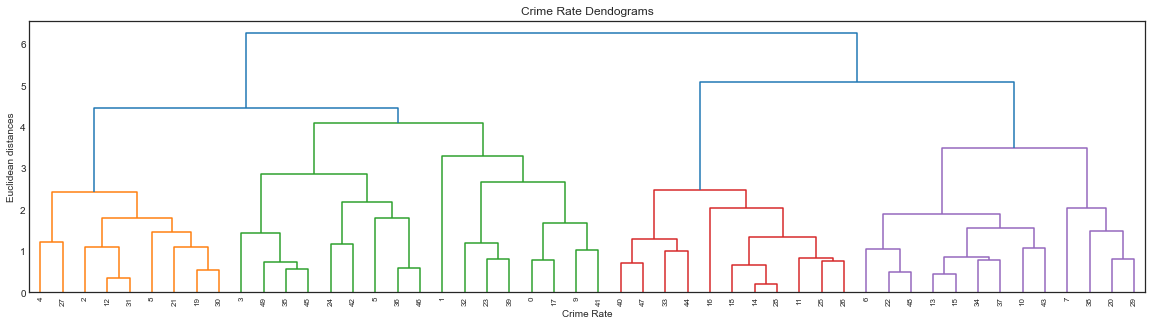

In [20]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

(d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

Scaling the variables does have an effect on the hierarchical clustering obtained. It effected what groups were in the clusters. In my opinion, the variables show be scaled because of this. 

10. In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

%matplotlib inline

(a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.
Hint: There are a number of functions in R that you can use to generate data. One example is the rnorm() function; runif() is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

In [21]:
# Generate dataset
X, y = make_blobs(n_samples=60, n_features=50, centers=3, cluster_std=5, random_state=1)

(b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

In [24]:
# PCA, first two principal components
pca = PCA(n_components=2, random_state=1)
X_r = pca.fit_transform(X)

Text(0, 0.5, 'Second principal component')

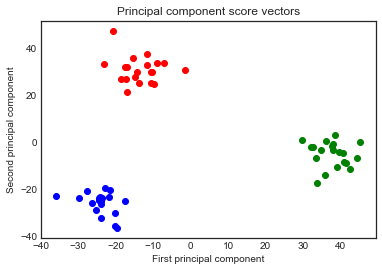

In [25]:
# Plot
plt.figure()
colors = ['blue', 'red', 'green']

for color, i in zip(colors, [0,1,2]):
    plt.scatter(X_r[y==i, 0], X_r[y==i, 1], color=color)
plt.title('Principal component score vectors')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

(c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means cluster- ing compare to the true class labels?
Hint: You can use the table() function in R to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

In [26]:
# Clustering labels using K-means
km3 = KMeans(n_clusters=3)
km3.fit(X)
km3.labels_

array([2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0, 2, 1, 2, 1,
       0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 0, 2], dtype=int32)

In [27]:
# True class labels
y

array([0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0])

The results show an agreement between true class labels and clustering labels. K-means clustering will arbitrarily number the clusters, so we cannot simply check whether the true class labels and clustering labels are the same. Here, the arbitrary attribution of numbers to the clusters led to the following correspondences:

Clustering label 0 --> true class label 1.
Clustering label 1 --> true class label 2.
Clustering label 2 --> true class label 0.
Considering these correspondences, we can see that both labels match perfectly.

(d) Perform K-means clustering with K = 2. Describe your results.

In [29]:
# Clustering labels using K-means
km3 = KMeans(n_clusters=2)
km3.fit(X)
km3.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int32)

In [30]:
# True class labels
y

array([0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0])

In this case, we only have two clustering labels. The results above show that when:

Clustering label is 0 --> true class label can be 0 or 1.
Clustering label is 1 --> true class label is 2;
This means that when K-means is equal to 2, we are merging the labels 0 and 1. Thus, we can say that label 2 corresponds to a finer set of observations.


(e) Now perform K-means clustering with K = 4, and describe your
results.

In [31]:
# Clustering labels using K-means
km3 = KMeans(n_clusters=4)
km3.fit(X)
km3.labels_

array([3, 1, 0, 2, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 0, 3, 0, 0, 3, 1, 3, 2,
       0, 3, 3, 0, 0, 0, 3, 2, 0, 2, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 3, 1,
       1, 3, 3, 3, 1, 3, 1, 1, 0, 0, 3, 0, 3, 1, 0, 3], dtype=int32)

In [32]:
# True class labels
y

array([0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0])

The results show the following correspondences between clustering and true labels:

Clustering label 0 --> True label 2.
Clustering label 1 --> True label 1.
Clustering label 2 --> True label 0.
Clustering label 3 --> True label 1.
We can conclude that the original cluster 1 (true label = 1), was split into two different clusters (clustering labels 1 and 3). The remaining clusters didn't have any significant change. This is an expected result, since the only coherent way to create a new cluster would be to split one of the original clusters, while remaining the other two unchanged.

(f) Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [33]:
# Clustering labels using K-means
km3 = KMeans(n_clusters=3)
km3.fit(X_r)
km3.labels_

array([1, 2, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 2,
       0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1], dtype=int32)

In [34]:
# True class labels
y

array([0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0])

The results show that, apart from the correspondences, true and clustering labels match perfectly. This means that the two principal components were able to reduce dimensionsal space without loss of information.

(g) Using the scale() function, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [35]:
# Scale variables
X_scaler = StandardScaler(with_mean=False)
X_scl = X_scaler.fit_transform(X)

In [36]:
# Clustering labels using K-means
km3 = KMeans(n_clusters=3)
km3.fit(X_scl)
km3.labels_

array([0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2,
       1, 0, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0], dtype=int32)

In [37]:
# True class labels
y

array([0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0])

As in the previous cases, apart from the correspondence between clustering and true class, the labels match perfectly. However, it should be noted that this is not an obvious result. The k-means algorithm is sensitive to the scale of the variables. Standardizing the observations can have a strong impact on the results obtained. Accordingly, it could have happened that the clustering and the true class didn't match.

The decision about standardizing or not the variables depends on the data. In a real case, we should look for different choices and go for the one that give us the most interpretable solution or the most useful solution.